In [108]:
import scipy.signal
import librosa
import matplotlib.pyplot as plt
import numpy as np

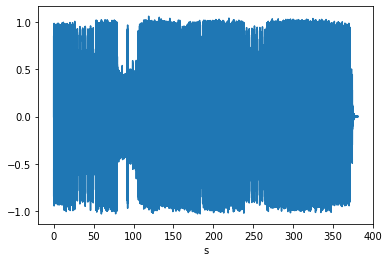

C:\Users\adrie\AppData\Local\Temp\ipykernel_33116\2220828385.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  k1 = np.int(0*sr)
C:\Users\adrie\AppData\Local\Temp\ipykernel_33116\2220828385.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

In [109]:
audio, sr = librosa.load("purple.mp3", sr=None, mono=True)
t = np.linspace(0, len(audio) / sr, len(audio))
plt.plot(t, audio)
plt.xlabel('s')
plt.show()

k1 = np.int(0*sr)
k2 = np.int(50*sr)
audio_crop = audio[k1:k2] * scipy.signal.windows.hann(k2-k1)

In [110]:
# Créer un filtre passe-bas de second ordre avec une fréquence de coupure de 1000 Hz
cutoff = 5
nyquist = sr / 2
low = cutoff / nyquist
order = 5 
b, a = scipy.signal.butter(order, low, btype='low')
# Appliquer le filtre au signal audio
filtered_audio = scipy.signal.lfilter(b, a, audio_crop)

In [111]:
# calculer la transformée de Fourier pour le signal audio original
fft_audio = np.fft.fft(audio_crop)
freq = np.fft.fftfreq(audio_crop.size, d=1/sr)

# calculer la transformée de Fourier pour le signal filtré
fft_filtered_audio = np.fft.fft(filtered_audio)
freq = np.fft.fftfreq(filtered_audio.size, d=1/sr)

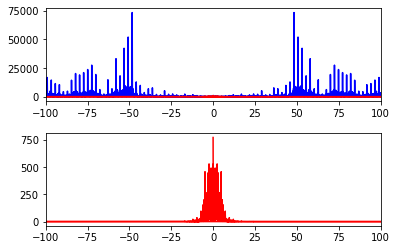

In [112]:
# afficher la transformée de Fourier
plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_audio), 'b')
plt.plot(freq, np.abs(fft_filtered_audio), 'r')
plt.xlim(-100, 100)
# plt.xlim(-100, 22_000)
plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(fft_filtered_audio), 'r')
plt.xlim(-100, 100)
# plt.xlim(-100, 22_000)
plt.subplots_adjust(hspace=0.35)
plt.show()

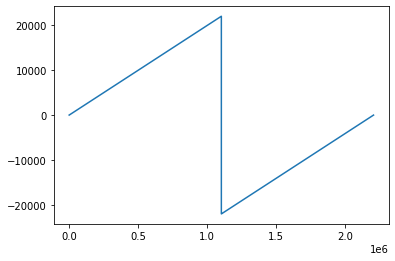

In [113]:
plt.plot(freq)

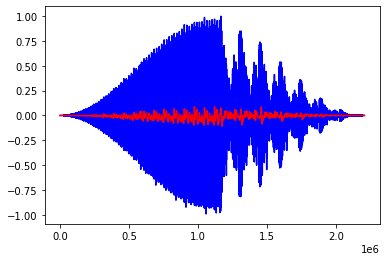

In [114]:
import soundfile as sf

# plt.plot(audio/np.amax(audio), 'b')
# plt.plot(filtered_audio/np.amax(filtered_audio), 'r')

plt.plot(audio_crop, 'b')
plt.plot(20*filtered_audio, 'r')

sf.write('stereo_file.wav', 50*filtered_audio, sr, subtype='PCM_24')

# plt.xlim(0,100)
# plt.title('Audio signal and filtered signal normalized')
# plt.legend()
plt.show()

In [115]:
# Extract BPM
index_bpm_Hz = np.argmax(np.abs(fft_filtered_audio))
if index_bpm_Hz == 0:
    fft_filtered_audio[index_bpm_Hz] = 0
index_bpm_Hz = np.argmax(np.abs(fft_filtered_audio))
print(index_bpm_Hz)
bpm_Hz = freq[index_bpm_Hz]
print(bpm_Hz)
bpm = bpm_Hz * 60
print(round(bpm))

121
2.42
145


In [116]:
#Nouveaux tests
f, t, Zxx = scipy.signal.stft(audio, sr, nperseg=512)


In [117]:

# plt.pcolormesh(t, f, np.abs(Zxx), cmap='viridis', vmin=0, vmax=None, shading='gouraud')

# plt.title('STFT Magnitude')

# plt.ylabel('Frequency [Hz]')

# plt.xlabel('Time [sec]')

# plt.show()